In [ ]:
pip install matplotlib


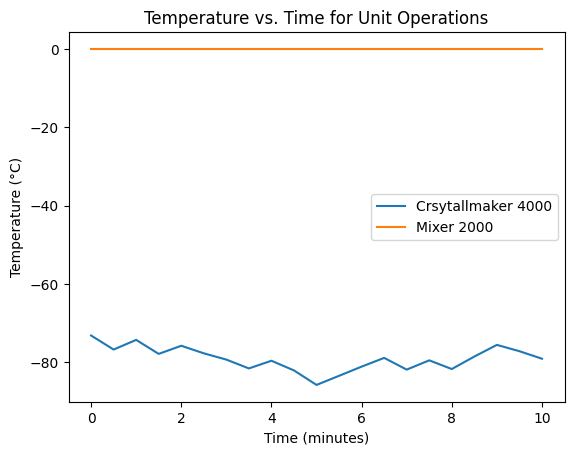

In [16]:
import xml.etree.ElementTree as ET
import random
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the XML content (replace 'your_file.xml' with the path to your XML file)
with open('/content/3unitoperation_temperature.xml', 'r') as xml_file:
    xml_content = xml_file.read()

# Parse the XML content
root = ET.fromstring(xml_content)

# Define observation time and time step
observation_time = timedelta(minutes=10)
time_step = timedelta(seconds=30)

# Create a new figure (canvas) for the plot
plt.figure()

# Iterate through UnitOperation elements
for unit_operation in root.findall('.//UnitOperation'):
    temperature_element = unit_operation.find('.//Temperature')
    device_element = unit_operation.find('.//device')

    if device_element is not None:
        device = device_element.text.strip()
    else:
        device = "Unknown Device"

    if temperature_element is not None:
        temperature_text = temperature_element.text.strip()

        # Handle temperature values with units
        if 'Celsius' in temperature_text:
            starting_temperature = float(temperature_text.split()[0])  # Extract numeric value from temperature in Celsius
        elif 'Kelvin' in temperature_text:
            kelvin_temp = float(temperature_text.split()[0])  # Extract numeric value from temperature in Kelvin
            starting_temperature = kelvin_temp - 273.15  # Convert Kelvin to Celsius
        else:
            try:
                # Try to extract numeric value (assuming it's Celsius)
                starting_temperature = float(temperature_text.split()[0])
            except ValueError:
                starting_temperature = 0  # Default to 0 if temperature format is not recognized

        # Initialize lists to store data for plotting
        time_values = []
        temperature_values = []

        # Simulate temperature over time for each unit operation
        current_time = timedelta(seconds=0)
        while current_time <= observation_time:
            time_values.append(current_time.total_seconds() / 60)  # Convert time to minutes
            temperature_values.append(starting_temperature)

            # Randomly choose whether to increase or decrease temperature by 2-5%
            temperature_change = starting_temperature * random.uniform(0.02, 0.05)
            if random.choice([True, False]):
                starting_temperature += temperature_change  # Simulate temperature increase
            else:
                starting_temperature -= temperature_change  # Simulate temperature decrease

            current_time += time_step

        # Plot the temperature graph for the current unit operation
        plt.plot(time_values, temperature_values, label=device)

# Add labels, title, and legend
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Time for Unit Operations')
plt.legend()

# Show the plot
plt.show()
